Here We are going to perform Random Regression approach and see that how this algorithm is going to predict the future data of like counts

In [4]:
import pandas as pd
import numpy as np
import ipywidgets as widgets

Reading Our same Filtered Data

In [2]:
df1 = pd.read_csv("Filtered-1.csv")

In [3]:
df1

,t_day,t_month,t_year,Genre,views,likes,dislikes,comment_count
0,1,1,1,Science & Technology,3237,161,2,35
1,6,6,6,People & Blogs,43012,754,87,123
2,4,4,4,Science & Technology,3635,84,3,21
3,1,1,1,Music,2152261,7824,158,324
4,4,4,4,Entertainment,140520,1852,33,113
...,...,...,...,...,...,...,...,...
6450,4,4,4,People & Blogs,300769,8595,150,2802
6451,8,8,8,People & Blogs,157819,19559,52,1962
6452,7,7,7,Howto & Style,193794,7547,78,824
6453,8,8,8,People & Blogs,193223,8141,302,1226


In [5]:
X = df1[['Genre','views','dislikes','comment_count']]

In [6]:
y = df1['likes']

Importing One Hot Encoder

In [8]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()

In [9]:
enc = oh.fit_transform(df1[['Genre']]).toarray()

In [10]:
encode = pd.DataFrame(enc)

In [11]:
for i in range(15):
  df1[i]=encode[i].values

In [12]:
df1

,t_day,t_month,t_year,Genre,views,likes,dislikes,comment_count,0,1,...,5,6,7,8,9,10,11,12,13,14
0,1,1,1,Science & Technology,3237,161,2,35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6,6,6,People & Blogs,43012,754,87,123,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4,4,4,Science & Technology,3635,84,3,21,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,1,Music,2152261,7824,158,324,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,4,Entertainment,140520,1852,33,113,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6450,4,4,4,People & Blogs,300769,8595,150,2802,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6451,8,8,8,People & Blogs,157819,19559,52,1962,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6452,7,7,7,Howto & Style,193794,7547,78,824,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6453,8,8,8,People & Blogs,193223,8141,302,1226,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
X = df1.drop(['t_day','t_month','t_year','likes','Genre'],axis = 1)

In [14]:
y = df1['likes']

Here we are dividing our dataset into two parts testing and training dataset in which 25% we are taking as testing dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

Here we are creating object of our Random Forest Regressor 
Random Forest regressor is and ensemble technique

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

Fitting our data into our Random Forest object

In [17]:
rf.fit(X_train,y_train)

c:\Users\singh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor()

Here we are predicting our y_pred data and with the help of our X_test dataset

In [23]:
y_pred = rf.predict(X_test)

c:\Users\singh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [24]:
import matplotlib.pyplot as plt

In [25]:
import seaborn as sns

In [26]:
y_test.values

array([   133,   5981, 107556, ...,    776,   5943,   2883], dtype=int64)

<AxesSubplot: xlabel='views'>

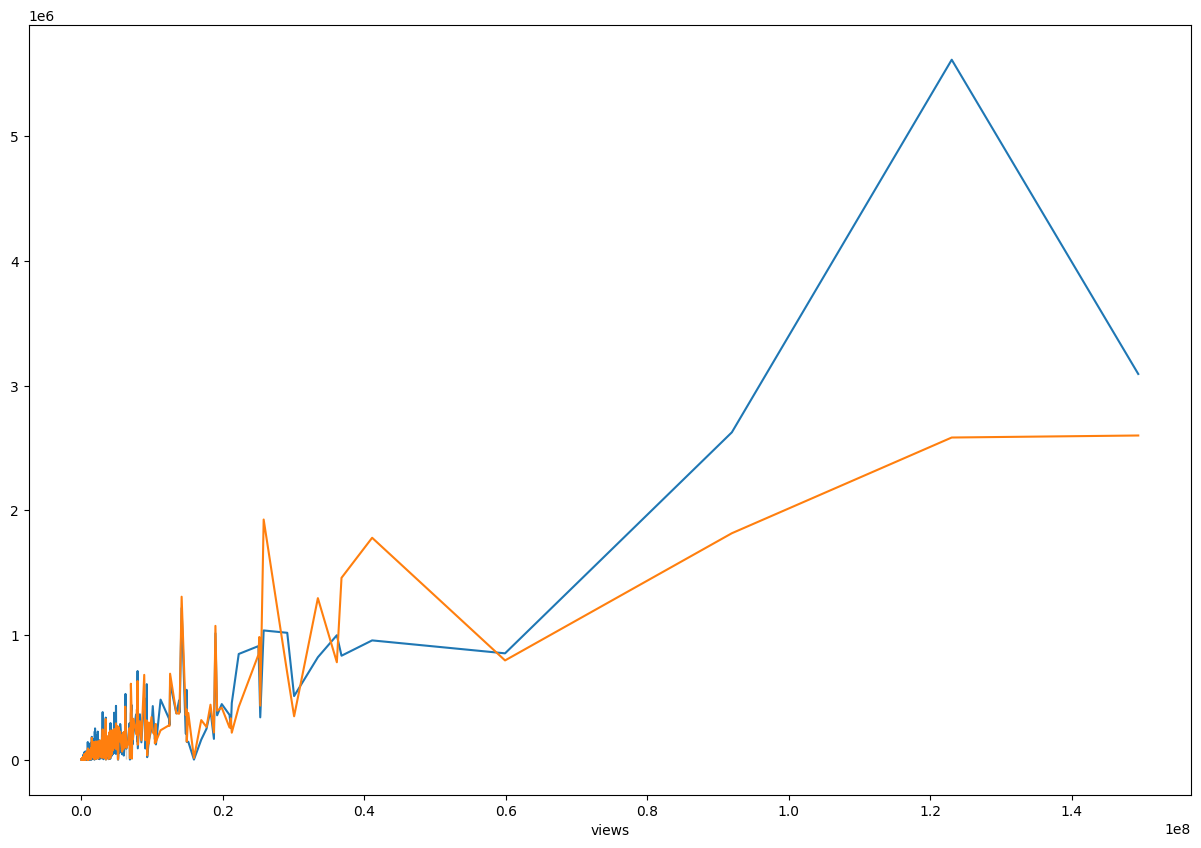

In [27]:
plt.figure(figsize=(15,10))
sns.lineplot(x = X_test['views'],y = y_test.values)
sns.lineplot(x = X_test['views'],y = y_pred)

As we can see in this graph, after 0.6 x value our predicted data is not accurate as it was in our linear regression algorithm

In [29]:
rf.score(X_test,y_test)

c:\Users\singh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7838764057138644

Accuracy score is also not good as compared to Linear Regression Approach

In [30]:
X_train

,views,dislikes,comment_count,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
4231,159575,76,225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
180,1615691,2891,4219,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
580,1025505,1160,5811,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5959,5969,26,104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1621,355153,434,441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,341276,252,1143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
977,3598002,1758,2768,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1401,220118,111,386,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,5739252,9905,90039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
"""

Create GUI by ipywidgets

"""

'\n\nCreate GUI by ipywidgets\n\n'

In [32]:
x = widgets.IntSlider(
    value=7,
    min=0,
    max=10000000,
    step=1,
    description='Views:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='d'
)
y = widgets.IntSlider(
    value=7,
    min=0,
    max=100000,
    step=1,
    description='dislike:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='d'
)


z = widgets.IntSlider(
    value=7,
    min=0,
    max=10000,
    step=1,
    description='comment_count:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='d'
)


k = widgets.Dropdown(
    options=list(df1['Genre'].unique()),
    value=None,
    description='Genre:',
    disabled=False,
)
view = []
dis = []
com = []
Gen = []

def view_take(vi):
  view.clear()
  view.append(vi)

def dislike_take(di):
  dis.clear()
  dis.append(di)
def comment_take(ci):
  com.clear()
  com.append(ci)
def Genre_take(gi):
  print(gi)
  # ty = np.array(df1.loc[[0],0:][df1['Genre']==gi])
  ty = np.array(df1.loc[:,0:][df1['Genre']==gi])[0]
  Gen.clear()
  Gen.append(list(ty))



In [33]:
widgets.interact(view_take,vi=x)
widgets.interact(dislike_take,di=y)
widgets.interact(comment_take,ci=z)
widgets.interact(Genre_take,gi=k)

interactive(children=(IntSlider(value=7, continuous_update=False, description='Views:', max=10000000, orientat…

interactive(children=(IntSlider(value=7, continuous_update=False, description='dislike:', max=100000, orientat…

interactive(children=(IntSlider(value=7, continuous_update=False, description='comment_count:', max=10000, ori…

interactive(children=(Dropdown(description='Genre:', options=('Science & Technology', 'People & Blogs', 'Music…

<function __main__.Genre_take(gi)>

In [36]:

def pred():
    pred_value = rf.predict([view+dis+com+Gen[0]])
    print('total Probable likes will be-----',int(pred_value))
    return int(pred_value)

widgets.IntProgress(
    value=pred(),
    min=0,
    max=100000,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    style={'bar_color': 'maroon'},
    orientation='vertical'
    )


total Probable likes will be----- 11833


IntProgress(value=11833, description='Loading:', max=100000, orientation='vertical', style=ProgressStyle(bar_c…